In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
class Consumer:
    channels = ['facebook', 'youtube', 'email', 'search']
    phases = ['problem recognition', 'information search', 'evaluation of alternatives', 
              'purchase decision', 'purchase', 'repurchase']

    base_effectiveness = np.array([
    [0.05, 0.1, 0.5, 0.0],  # problem recognition
    [0.05, 0.1, 0.5, 0.1],  # information search
    [0.07, 0.08, 0.6, 0.1],  # evaluation of alternatives
    [0.08, 0.05, 0.6, 0.05],  # purchase decision
    [0.09, 0.0, 0.6, 0.1],  # purchase
    [0.1, 0.0, 0.6, 0.1]]) # repurchase

    def __init__(self, uid):
        self.uid = uid
        self.phase = np.random.randint(0,6)
        self.transitions = np.random.uniform(0, 0.1, 6)
        self.channel_phase_suitability = np.random.uniform(0, 0.1, size = [6,4]) + self.base_effectiveness
        self.phase_cooldowns = np.random.randint(0, 8, 6)
        self.phase_cooldowns[5] = np.random.randint(8, 31)
        self.phase_cooldown = 0
        self.channel_preference = np.random.exponential(size=5) # last channel is "not online / no ads"
        self.channel_preference = self.channel_preference/self.channel_preference.sum()
        
    def see_ad(self, ad_channel):
        clickthrough = False
        purchase = False
        if self.phase_cooldown == 0:
            transition_probability = (self.channel_phase_suitability * self.transitions.reshape(6,1))[self.phase, ad_channel]
            if transition_probability > np.random.random():
                purchase = self.transition()
                if np.random.random() < 0.1:
                    clickthrough = True
            else:
                if np.random.random() < 0.01:
                    clickthrough = True
        return clickthrough, purchase
    
    def day(self, timestamp):
        self.phase_cooldown = np.max([0, self.phase_cooldown - 1])
        today_ads = np.max([0, int(np.random.normal(10, 10))])
        if today_ads == 0:
            return
        ad_channels = np.random.choice(np.arange(5), size=today_ads, p = self.channel_preference)
        ad_channels[np.where([ad_channels==2])[1][1:]] = 4
        timestamps = [timestamp + timedelta(hours = 16 * i/(today_ads)) for i in range(today_ads)]
        
        responses = []
        
        for idx, ad_channel in enumerate(ad_channels):
            if ad_channel != 4:
                row = [self.uid, timestamps[idx].strftime('%Y-%m-%d %H:%M:%S'), self.channels[ad_channel]] + list(self.see_ad(ad_channel))
                row = dict(zip(['uid', 'timestamp', 'channel', 'clickthrough', 'purchase'], row))
                responses.append(row)
        return responses
        
        
    def transition(self):
        purchase = False
        self.phase_cooldown = self.phase_cooldowns[self.phase]
        self.phase += 1
        if 0.9 > np.random.random():
            clickthrough = True
        if self.phase > 4:
            purchase = True
        if self.phase==6:
            self.phase=5
        return purchase
    

In [4]:
uids = np.random.choice(np.arange(1000000, 10000000), size=10000)
consumers = [Consumer(uid) for uid in uids]

In [5]:
u = pd.DataFrame({'uid': np.random.choice(np.arange(1000000, 10000000), size=10000),
                  'gender': np.random.choice(a = ['Male','Female'], size = 10000, p = [.6,.4]),
                    'age': np.random.poisson(lam = 25, size = 10000)})

In [6]:

responses = []
start = datetime(2021, 1, 1, 8, 0, 0)

for i in range(100):
    day = start + timedelta(days=i)
    print(day.strftime('%Y-%m-%d'))
    for c in consumers:
        response =  c.day(day)
        if response:
            responses.extend(response)

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-01-14
2021-01-15
2021-01-16
2021-01-17
2021-01-18
2021-01-19
2021-01-20
2021-01-21
2021-01-22
2021-01-23
2021-01-24
2021-01-25
2021-01-26
2021-01-27
2021-01-28
2021-01-29
2021-01-30
2021-01-31
2021-02-01
2021-02-02
2021-02-03
2021-02-04
2021-02-05
2021-02-06
2021-02-07
2021-02-08
2021-02-09
2021-02-10
2021-02-11
2021-02-12
2021-02-13
2021-02-14
2021-02-15
2021-02-16
2021-02-17
2021-02-18
2021-02-19
2021-02-20
2021-02-21
2021-02-22
2021-02-23
2021-02-24
2021-02-25
2021-02-26
2021-02-27
2021-02-28
2021-03-01
2021-03-02
2021-03-03
2021-03-04
2021-03-05
2021-03-06
2021-03-07
2021-03-08
2021-03-09
2021-03-10
2021-03-11
2021-03-12
2021-03-13
2021-03-14
2021-03-15
2021-03-16
2021-03-17
2021-03-18
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-24
2021-03-25
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01

In [38]:
data = pd.DataFrame(responses)
data = pd.merge(data, u, on = 'uid')
data['revenue'] = np.where(data['purchase'] == False, 0, 15)
data.replace({True: 1, False: 0}, inplace = True)
data.head()

,uid,timestamp,channel,clickthrough,purchase,gender,age,revenue
0,3305034,2021-01-01 08:00:00,facebook,0,0,Female,24,0
1,3305034,2021-01-01 09:27:16,youtube,0,0,Female,24,0
2,3305034,2021-01-01 10:54:32,facebook,0,0,Female,24,0
3,3305034,2021-01-01 12:21:49,search,0,0,Female,24,0
4,3305034,2021-01-01 13:49:05,youtube,0,0,Female,24,0


In [21]:
channels = data.groupby(['channel'])['revenue'].sum()
channels

channel
email       225
facebook    195
search      120
youtube      60
Name: revenue, dtype: int64

Text(0.5, 1.0, "Each Channel's Revenue")

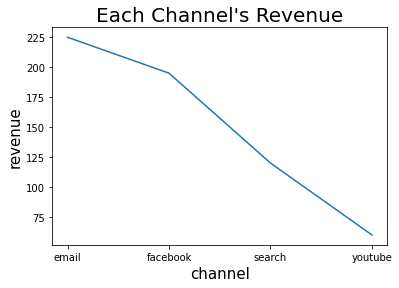

In [33]:
plt.plot(channels)
plt.xlabel('channel', fontsize = 15)
plt.ylabel('revenue', fontsize = 15)
plt.title("Each Channel's Revenue", fontsize = 20)

<AxesSubplot:xlabel='channel,clickthrough'>

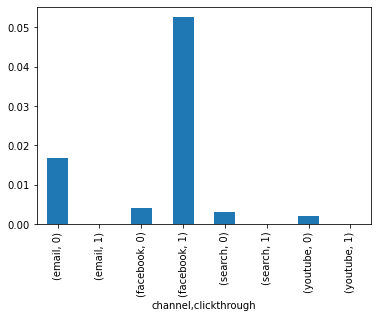

In [56]:
clickthrough = data.groupby(['channel', 'clickthrough'])['purchase'].mean()
clickthrough.plot.bar()

In [55]:
clickthrough

channel   clickthrough
email     0               15
          1                0
facebook  0               12
          1                1
search    0                8
          1                0
youtube   0                4
          1                0
Name: purchase, dtype: int64

In [61]:
gender = data.groupby(['gender', 'channel']).sum()
gender.drop(['uid','age'], axis = 1, inplace = True)
gender

clickthrough  purchase  revenue
gender channel                                  
Female email                2         2       30
       facebook             3         3       45
       search               5         0        0
       youtube             10         1       15
Male   email               11        13      195
       facebook            16        10      150
       search              18         8      120
       youtube              4         3       45

In [66]:
views = data.groupby(['uid', 'channel'])['timestamp'].count()
views

uid      channel 
1679621  email        60
         facebook    349
         search      182
         youtube      27
3128248  email        78
         facebook     77
         search      122
         youtube     387
3305034  email        36
         facebook    322
         search      201
         youtube     242
3350066  email         9
         facebook    753
         search      137
         youtube      24
4295539  email        83
         facebook     30
         search      241
         youtube      75
5660607  email        68
         facebook     83
         search      558
         youtube      15
6108892  email        82
         facebook    295
         search       13
         youtube      71
6141950  email        76
         facebook      3
         search      339
         youtube     113
6452596  email        65
         facebook     53
         search      178
         youtube     298
7002381  email        75
         facebook    480
         search       79
       